# Merchandise Popularity Prediction 

# 1.Reviewing Data, 2.Data Preprocessing, 3.Exploratory Data Analysis (EDA),

In [45]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
#reading csv file
train = pd.read_csv(r"C:\Users\Swati Patle\Downloads\Train.csv\Train.csv")

In [49]:
# The first 5 observation 
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [50]:
# The last 5 observation 
train.tail()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
18203,0.403,0.28100,6,-10.365,0,0.454,0.000000,0.1060,0.182,112.881,232880,4
18204,0.481,0.01140,4,-26.196,1,0.991,0.967000,0.0985,0.343,57.748,155500,4
18205,0.168,0.00908,5,-33.966,0,0.947,0.946000,0.1250,0.396,68.775,172500,4
18206,0.598,0.65800,1,-7.159,0,0.389,0.000000,0.5820,0.473,106.807,152558,4
18207,0.582,0.32400,2,-10.284,1,0.807,0.000034,0.1500,0.249,88.755,237293,3


In [51]:
# The size of the data set 
train.shape

(18208, 12)

In [52]:
# Feature information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [53]:
# checking duplicate values in DataFrame
duplicates = train.duplicated()
print(duplicates.sum())     # Number of duplicated rows
print(train[duplicates])    # Duplicated rows

2923
       Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
455          0.641       0.32400          11       -5.851           1   
591          0.112       0.02640           7      -28.927           1   
598          0.687       0.57700          10       -7.801           0   
629          0.320       0.00892           8      -29.206           1   
661          0.704       0.88400           8       -6.275           1   
...            ...           ...         ...          ...         ...   
18195        0.730       0.70500           5       -4.358           0   
18196        0.147       0.38100           1      -28.083           1   
18197        0.532       0.02020           4      -22.763           1   
18204        0.481       0.01140           4      -26.196           1   
18205        0.168       0.00908           5      -33.966           0   

       Store_Presence   Score_1  Score_2  Score_3  Score_4    time  popularity  
455           0.69800  0.000000   0.3

In [54]:
# To remove duplicates in-place:
train.drop_duplicates(inplace=True)

In [55]:
# checking duplicate values in DataFrame
duplicates = train.duplicated()
print(duplicates.sum())     # Number of duplicated rows
print(train[duplicates])    # Duplicated rows

0
Empty DataFrame
Columns: [Store_Ratio, Basket_Ratio, Category_1, Store_Score, Category_2, Store_Presence, Score_1, Score_2, Score_3, Score_4, time, popularity]
Index: []


In [57]:
train.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [58]:
# The size of the data set 
train.shape

(15285, 12)

In [59]:
# getting type of columns
column_types = train.dtypes
print(column_types)

Store_Ratio       float64
Basket_Ratio      float64
Category_1          int64
Store_Score       float64
Category_2          int64
Store_Presence    float64
Score_1           float64
Score_2           float64
Score_3           float64
Score_4           float64
time                int64
popularity          int64
dtype: object


In [60]:
#getting correlation between target variable and other variables
corr= train.corr()
corr.style.background_gradient(cmap='BrBG')

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
Store_Ratio,1.000000,0.453653,0.042702,0.579793,-0.096637,-0.450610,-0.429869,-0.042446,0.615432,0.107917,-0.075877,0.232360
Basket_Ratio,0.453653,1.000000,0.048168,0.821896,-0.108873,-0.811553,-0.583105,0.257677,0.519984,0.255437,0.077245,0.205037
Category_1,0.042702,0.048168,1.000000,0.041479,-0.148276,-0.046148,-0.032720,0.017054,0.039376,0.002141,-0.008862,0.003255
Store_Score,0.579793,0.821896,0.041479,1.000000,-0.081731,-0.707084,-0.703222,0.136806,0.508327,0.261071,0.050414,0.207316
Category_2,-0.096637,-0.108873,-0.148276,-0.081731,1.000000,0.096904,0.012108,-0.034441,-0.040082,-0.034771,-0.015498,-0.034166
Store_Presence,-0.450610,-0.811553,-0.046148,-0.707084,0.096904,1.000000,0.535580,-0.179129,-0.411032,-0.217470,-0.050624,-0.196013
Score_1,-0.429869,-0.583105,-0.032720,-0.703222,0.012108,0.535580,1.000000,-0.098179,-0.457041,-0.194036,-0.076290,-0.158218
Score_2,-0.042446,0.257677,0.017054,0.136806,-0.034441,-0.179129,-0.098179,1.000000,0.035843,0.018684,-0.003450,-0.002890
Score_3,0.615432,0.519984,0.039376,0.508327,-0.040082,-0.411032,-0.457041,0.035843,1.000000,0.175598,-0.004532,0.177397
Score_4,0.107917,0.255437,0.002141,0.261071,-0.034771,-0.217470,-0.194036,0.018684,0.175598,1.000000,0.022467,0.045690


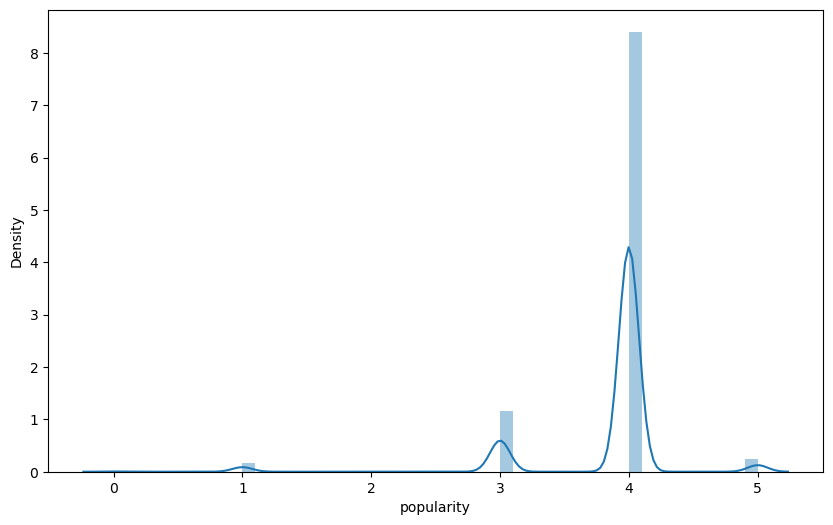

In [61]:
#plotting displot for depicting frequency of value of target variables
plt.figure(figsize=(10,6))
sns.distplot(train['popularity'])
plt.show()

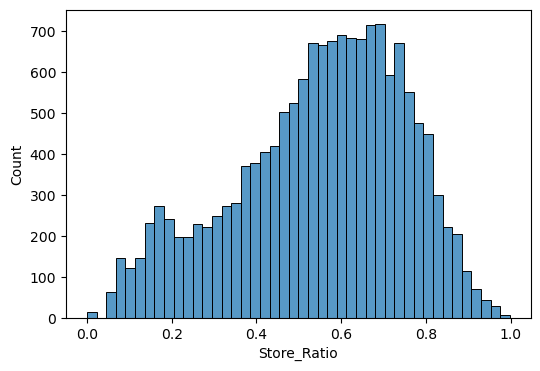

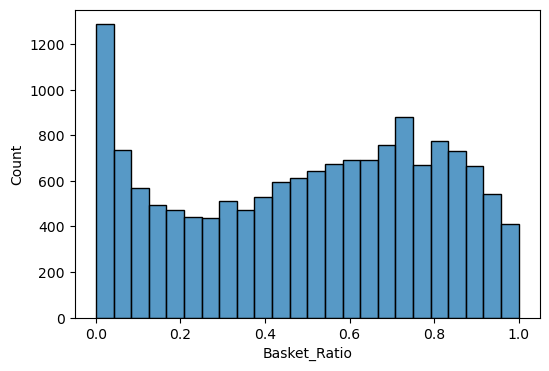

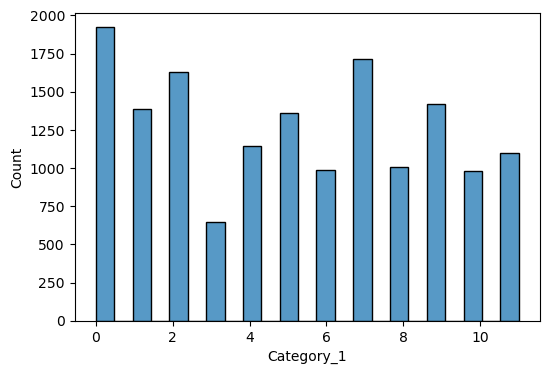

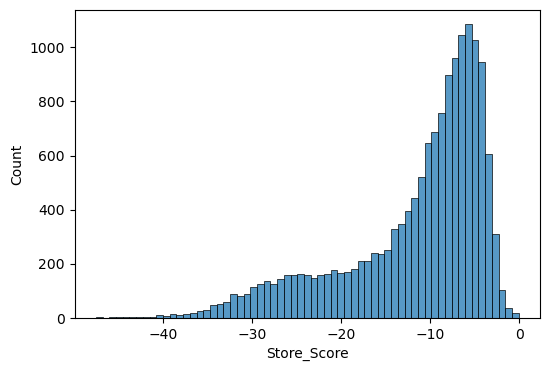

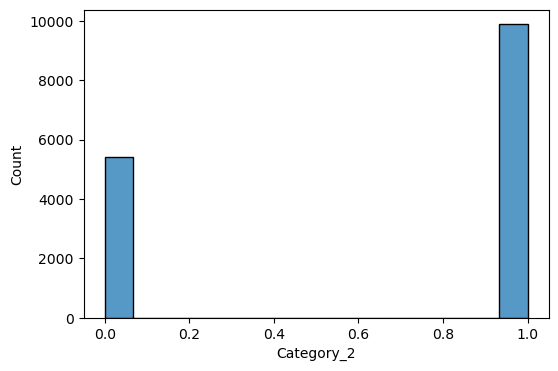

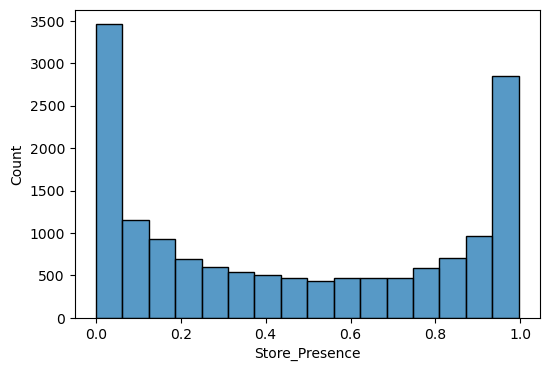

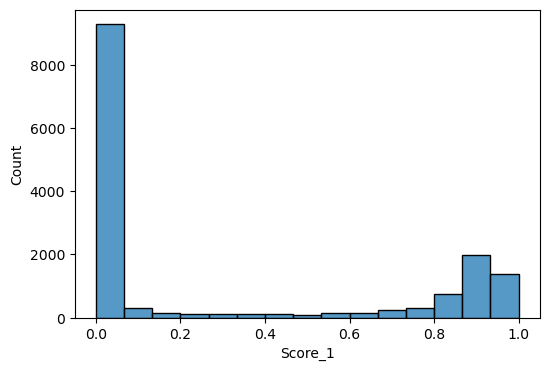

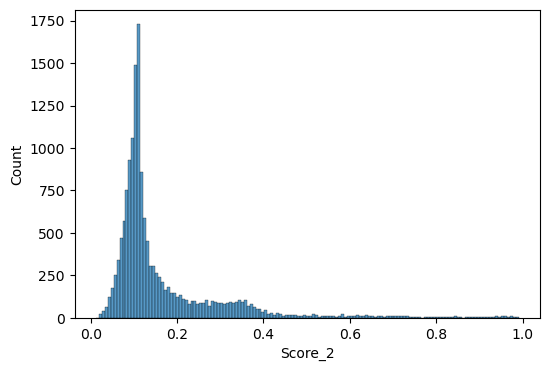

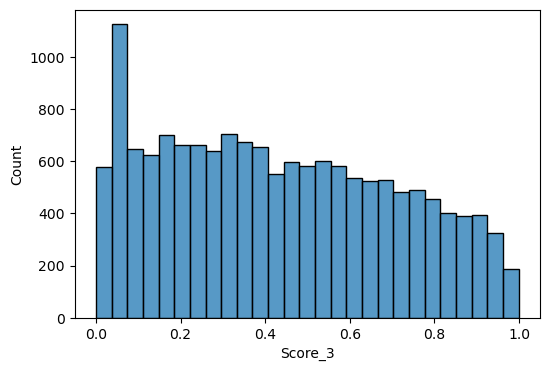

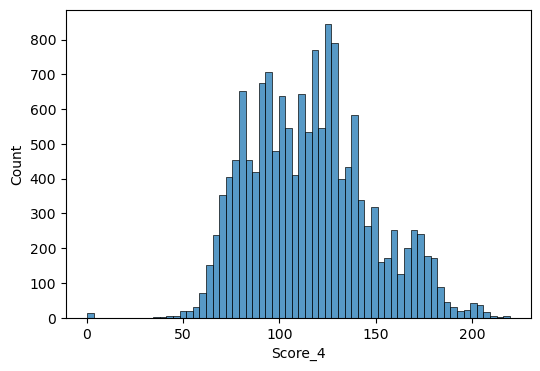

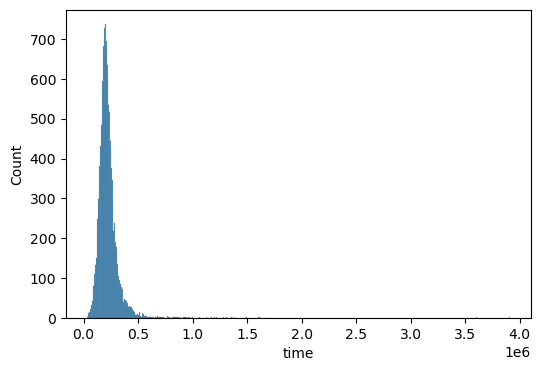

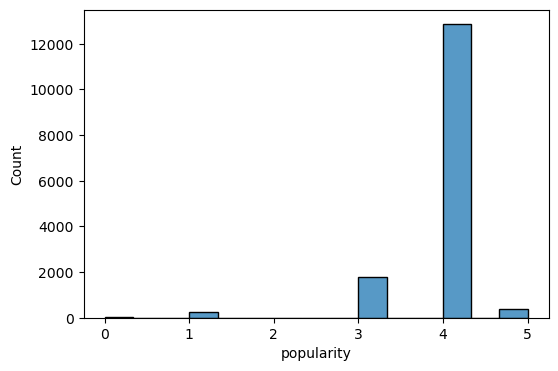

In [62]:
#plotting histogram for variables for easy understanding
for i in train.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(train[i])

# 4.Modeling, 5.prediction, 6.Model Evaluation(Cross Validation)

In [63]:
# Defining X and y variable for training and testing
X = train.drop("popularity",axis=1)   # dropping target variable or taking all other variables except target variable
y = train["popularity"]               # taking target variable 
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)

In [64]:
# Decision tree 
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
dt = DecisionTreeClassifier()
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
# Make predictions
y_pred_dt = dt.predict(X_test)

In [66]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7592410860320575
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.04      0.03      0.04        62
           3       0.26      0.27      0.26       356
           4       0.87      0.87      0.87      2557
           5       0.07      0.08      0.07        78

    accuracy                           0.76      3057
   macro avg       0.45      0.45      0.45      3057
weighted avg       0.76      0.76      0.76      3057



In [67]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [68]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [69]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8384036637226039
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.00      0.00      0.00        62
           3       0.43      0.09      0.15       356
           4       0.85      0.99      0.91      2557
           5       0.00      0.00      0.00        78

    accuracy                           0.84      3057
   macro avg       0.46      0.42      0.41      3057
weighted avg       0.76      0.84      0.78      3057



In [70]:
# Support Vector Machine (SVM)
from sklearn import svm
# Create an SVM classifier with an RBF kernel
sv = svm.SVC(kernel='rbf')
sv.fit(X_train, y_train)

SVC()

In [71]:
# Make predictions
y_pred_sv = sv.predict(X_test)

In [72]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_sv)
print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_sv))

Accuracy: 0.8364409551848218
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        62
           3       0.00      0.00      0.00       356
           4       0.84      1.00      0.91      2557
           5       0.00      0.00      0.00        78

    accuracy                           0.84      3057
   macro avg       0.17      0.20      0.18      3057
weighted avg       0.70      0.84      0.76      3057



In [73]:
# K Nearest Neighbour(KNN)
from sklearn.neighbors import KNeighborsClassifier 
k= 10
knn = KNeighborsClassifier(n_neighbors=k)
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [74]:
# Make predictions
y_pred_knn = knn.predict(X_test)

In [75]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8318613019299967
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        62
           3       0.21      0.02      0.03       356
           4       0.84      0.99      0.91      2557
           5       0.00      0.00      0.00        78

    accuracy                           0.83      3057
   macro avg       0.21      0.20      0.19      3057
weighted avg       0.73      0.83      0.76      3057



In [76]:
#CrossValidation of a Model
from sklearn.model_selection import cross_val_score, cross_validate

def evaluate_model_with_cv(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print("-" * 30)

# Initialize models
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=46),
    svm.SVC(kernel='rbf'),
    KNeighborsClassifier(n_neighbors=10)
]

# Evaluate each model with cross-validation
for model in models:
    evaluate_model_with_cv(model, X, y, cv=5)

Model: DecisionTreeClassifier
Mean Accuracy: 0.7520
Standard Deviation: 0.0069
------------------------------
Model: RandomForestClassifier
Mean Accuracy: 0.8389
Standard Deviation: 0.0015
------------------------------
Model: SVC
Mean Accuracy: 0.8407
Standard Deviation: 0.0000
------------------------------
Model: KNeighborsClassifier
Mean Accuracy: 0.8374
Standard Deviation: 0.0011
------------------------------
